# Evaluación del impacto institucional


## Objetivo del caso de uso

Este caso de uso tiene como objetivo cuantificar y describir el impacto de la producción académica de una institución a partir de indicadores derivados de fuentes abiertas como OpenAlex y OpenAIRE.

Se busca ofrecer una mirada integradora que permita responder preguntas como:  
- ¿Qué nivel de citación tiene la producción institucional?
- ¿Cuál es la visibilidad (open access) de las publicaciones?
- ¿Qué porcentaje de trabajos se encuentra en el top 10% de su disciplina?
- ¿Cómo ha evolucionado el impacto a lo largo del tiempo?


## Actores y destinatarios

Los principales actores interesados en este análisis son:

- **Gestores institucionales** (secretarías de investigación, posgrados, rectorado), para la toma de decisiones.
- **Investigadores/as**, como insumo para evaluar la proyección de su grupo.
- **Evaluadores externos**, que requieren evidencia del impacto académico.
- **Áreas de ciencia abierta**, que monitorean cumplimiento de políticas de acceso abierto.

Este caso de uso también puede alimentar reportes automáticos o tableros institucionales.

## ¿Qué datos se usan?

Se utilizan datos integrados en el Data Vault desde OpenAlex y OpenAIRE, principalmente:

- Información bibliográfica y de citación de publicaciones institucionales.
- Indicadores normalizados: percentiles, citación, FWCI (Field Weighted Citation Impact).
- Estado de acceso abierto de cada trabajo.

La unidad de análisis son las publicaciones que tengan al menos un autor institucional confirmado.

### Procesamiento de datos

##### Imports y configuración inicial

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

import seaborn as sns
import matplotlib.pyplot as plt



#### Carga de datos


##### OpenAlex

Se cargan los datos:
* Hub de Works
* Hub de DOI
* Links entre Work y DOI
* Satélites de Work

In [32]:
hub_openalex_work = catalog.load('stg_openalex/hub_openalex_work')
hub_openalex_doi = catalog.load('stg_openalex/hub_openalex_doi')
hub_openalex_pmid = catalog.load('stg_openalex/hub_openalex_pmid')
hub_openalex_pmcid = catalog.load('stg_openalex/hub_openalex_pmcid')
hub_openalex_mag = catalog.load('stg_openalex/hub_openalex_mag')
hub_openalex_author = catalog.load('stg_openalex/hub_openalex_author')
hub_openalex_orcid = catalog.load('stg_openalex/hub_openalex_orcid')

link_openalex_work_doi = catalog.load('stg_openalex/link_openalex_work_doi')
link_openalex_work_pmid = catalog.load('stg_openalex/link_openalex_work_pmid')
link_openalex_work_pmcid = catalog.load('stg_openalex/link_openalex_work_pmcid')
link_openalex_work_mag = catalog.load('stg_openalex/link_openalex_work_mag')
link_openalex_work_author = catalog.load('stg_openalex/link_openalex_work_author')
link_openalex_author_orcid = catalog.load('stg_openalex/link_openalex_author_orcid')

sat_openalex_work = catalog.load('stg_openalex/sat_openalex_work')
sat_openalex_author = catalog.load('stg_openalex/sat_openalex_author')


[05/12/25 15:25:13] INFO     Loading data from stg_openalex/hub_openalex_work                   ]8;id=254165;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=430478;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[05/12/25 15:25:15] INFO     Loading data from stg_openalex/hub_openalex_doi                    ]8;id=429858;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=616602;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

                    INFO     Loading data from stg_openalex/hub_openalex_pmid                   ]8;id=912077;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=728407;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[05/12/25 15:25:16] INFO     Loading data from stg_openalex/hub_openalex_pmcid                  ]8;id=981299;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=383656;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

                    INFO     Loading data from stg_openalex/hub_openalex_mag                    ]8;id=818821;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=296346;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[05/12/25 15:25:17] INFO     Loading data from stg_openalex/hub_openalex_author                 ]8;id=382590;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=692907;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

                    INFO     Loading data from stg_openalex/hub_openalex_orcid                  ]8;id=551486;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=229688;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

                    INFO     Loading data from stg_openalex/link_openalex_work_doi              ]8;id=726124;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=43289;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[05/12/25 15:25:19] INFO     Loading data from stg_openalex/link_openalex_work_pmid             ]8;id=839345;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=799141;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

                    INFO     Loading data from stg_openalex/link_openalex_work_pmcid            ]8;id=145353;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=385588;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

                    INFO     Loading data from stg_openalex/link_openalex_work_mag              ]8;id=198953;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=814096;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[05/12/25 15:25:20] INFO     Loading data from stg_openalex/link_openalex_work_author           ]8;id=223196;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=615646;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[05/12/25 15:25:28] INFO     Loading data from stg_openalex/link_openalex_author_orcid          ]8;id=980136;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=374091;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

                    INFO     Loading data from stg_openalex/sat_openalex_work                   ]8;id=32796;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=927331;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[05/12/25 15:25:32] INFO     Loading data from stg_openalex/sat_openalex_author                 ]8;id=934137;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=839122;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

In [12]:
sat_openalex_work = sat_openalex_work[['work_hk','type','is_retracted','is_paratext','fwci','cited_by_count','referenced_works_count','publication_year','publication_date','oa_status','oa_url','is_oa','citation_normalized_percentile_is_in_top_10_percent','citation_normalized_percentile_is_in_top_1_percent','citation_normalized_percentile_value','cited_by_percentile_year_max','cited_by_percentile_year_min']]

In [13]:
sat_openalex_work

,work_hk,type,is_retracted,is_paratext,fwci,cited_by_count,referenced_works_count,publication_year,publication_date,oa_status,oa_url,is_oa,citation_normalized_percentile_is_in_top_10_percent,citation_normalized_percentile_is_in_top_1_percent,citation_normalized_percentile_value,cited_by_percentile_year_max,cited_by_percentile_year_min
0,b'\x00\x00\xd8}]]\xb7\xf5+)\x88\xb0\x0b\xd2\x0...,article,False,False,0,0,1,2020,2020-04-17 21:00:00,closed,https://dialnet.unirioja.es/descarga/articulo/...,False,False,False,0,60,0
1,b'\x00\x00\xde\x9a\n*\xab\x08\xf0\x9b\xb2F7\x1...,article,False,False,1,7,0,2020,2020-05-14 21:00:00,diamond,https://perio.unlp.edu.ar/ojs/index.php/questi...,True,False,False,1,84,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50090,b'\xff\xff!\xfd\xe2\x9cUD\xac\xb4\x85]\xbd\x18...,article,False,False,0,0,0,2015,2015-09-22 21:00:00,closed,NO DATA,False,False,False,0,66,0
50091,"b""\xff\xff,6\x87\xde}\xbe\x1a'g\x9bG\xb8\xc6\xb0""",article,False,False,5,3,0,2018,2018-09-02 21:00:00,closed,NO DATA,False,False,False,1,77,74


In [33]:
fact_publication_openalex = pd.merge(
    hub_openalex_work,
    sat_openalex_work
)

fact_publication_openalex = pd.merge(
    fact_publication_openalex,
    link_openalex_work_doi,
    how='left'
)

fact_publication_openalex = pd.merge(
    fact_publication_openalex,
    hub_openalex_doi,
    how='left'
)

fact_publication_openalex = pd.merge(
    fact_publication_openalex,
    link_openalex_work_pmid,
    how='left'
)

fact_publication_openalex = pd.merge(
    fact_publication_openalex,
    hub_openalex_pmid,
    how='left'
)

fact_publication_openalex = pd.merge(
    fact_publication_openalex,
    link_openalex_work_pmcid,
    how='left'
)

fact_publication_openalex = pd.merge(
    fact_publication_openalex,
    hub_openalex_pmcid,
    how='left'
)

fact_publication_openalex = pd.merge(
    fact_publication_openalex,
    link_openalex_work_mag,
    how='left'
)

fact_publication_openalex = pd.merge(
    fact_publication_openalex,
    hub_openalex_mag,
    how='left'
)

fact_publication_openalex.drop(columns=['work_doi_hk','work_pmid_hk','work_pmcid_hk','work_mag_hk'], inplace=True)

In [18]:
fact_publication_openalex

,work_hk,work_id,load_datetime,source,type,is_retracted,is_paratext,fwci,cited_by_count,referenced_works_count,publication_year,publication_date,oa_status,oa_url,is_oa,citation_normalized_percentile_is_in_top_10_percent,citation_normalized_percentile_is_in_top_1_percent,citation_normalized_percentile_value,cited_by_percentile_year_max,cited_by_percentile_year_min,doi_hk,doi,pmid_hk,pmid,pmcid_hk,pmcid,mag_hk,mag
0,b'\x00\x00\xd8}]]\xb7\xf5+)\x88\xb0\x0b\xd2\x0...,https://openalex.org/W3017375070,2025-03-11 06:31:08.187919,OPENALEX,article,False,False,0,0,1,2020,2020-04-17 21:00:00,closed,https://dialnet.unirioja.es/descarga/articulo/...,False,False,False,0,60,0,b'\xd0\xbf/h\xbf\xb1c\xbf]2DI\xdf\xcc@\x02',10.37603/2250.7728.v24.n1.28239,NaN,NaN,NaN,NaN,b'\xfe\x0e\x1cr\xfc\xa1\xe7{\xd5A[\\\xcf\xc01\...,3017375070
1,b'\x00\x00\xde\x9a\n*\xab\x08\xf0\x9b\xb2F7\x1...,https://openalex.org/W3031656744,2025-03-11 06:31:08.187919,OPENALEX,article,False,False,1,7,0,2020,2020-05-14 21:00:00,diamond,https://perio.unlp.edu.ar/ojs/index.php/questi...,True,False,False,1,84,82,b'\xf9\x178\xe5Gb\xd2#=U\x9e\xc0\xd73\x82$',10.24215/16696581e278,NaN,NaN,NaN,NaN,b'\x08\x97\xc1\xd5E\x06d:\x86S\xacg\xd6\x91\x8...,3031656744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50090,b'\xff\xff!\xfd\xe2\x9cUD\xac\xb4\x85]\xbd\x18...,https://openalex.org/W2582024342,2025-03-11 06:31:08.187919,OPENALEX,article,False,False,0,0,0,2015,2015-09-22 21:00:00,closed,NO DATA,False,False,False,0,66,0,NaN,NaN,NaN,NaN,NaN,NaN,b'\xe3\xb2\x0c\x17\xf1\x10\xbd\xe9\xa0|\xc0\x1...,2582024342
50091,"b""\xff\xff,6\x87\xde}\xbe\x1a'g\x9bG\xb8\xc6\xb0""",https://openalex.org/W2942219882,2025-03-11 06:31:08.187919,OPENALEX,article,False,False,5,3,0,2018,2018-09-02 21:00:00,closed,NO DATA,False,False,False,1,77,74,b'8\xa0\n\x1f\x1a8\t\x85T/\x83\x90\xdf\xe7\xec...,10.5380/jlasss.v9i1.61189,NaN,NaN,NaN,NaN,b'\xcd{\xde*}\xd1\xffa\xca\xc8(F\xf1`\x975',2942219882


In [34]:
dim_author_openalex = pd.merge(
    hub_openalex_author,
    sat_openalex_author
).drop(columns=['source','load_datetime','hashdiff'])

dim_author_openalex = pd.merge(
    dim_author_openalex,
    link_openalex_author_orcid,
    how='left'
).drop(columns=['source','load_datetime'])

dim_author_openalex = pd.merge(
    dim_author_openalex,
    hub_openalex_orcid,
    how='left'
).drop(columns=['source','load_datetime','author_orcid_hk'])



In [36]:
dim_author_openalex

,author_hk,author_id,display_name,works_count,cited_by_count,orcid_hk,orcid
0,b'\x00\x00\x9c\x13\x02\x05\xb0\xdb\x0b\xdeE\xc...,https://openalex.org/A5081627135,Julieta Bejar,1,0,NaN,NaN
1,b'\x00\x05\x95p\xa1\xa6v6M\x97H\xc1\xe6[\x8bY',https://openalex.org/A5084406472,Juliana Jaen,18,40,b'PB\x05]o\xc1\xa9n\t$\x93T\x90\xf7\xfc?',0000-0003-0171-9036
...,...,...,...,...,...,...,...
20218,b'\xff\xf5\xc4\xbcLb_\x02C\xcbf\xac7r\xf5\x1a',https://openalex.org/A5074777941,Santiago Stavale,12,9,NaN,NaN
20219,b'\xff\xfe\xfb\x06\xa9\xe7\x7f\xa8\xcdx4\xc4\x...,https://openalex.org/A5111667539,Ineés Sunesen,1,17,NaN,NaN


##### IR

Se cargan los datos del:

* Hub de items
* Hub de DOI
* Hub de handles
* links entre items y DOI
* links entre items y handles
* Satelite de items

In [3]:
hub_ir_item = catalog.load('stg_dspace5/hub_dspace5_item')
hub_ir_doi = catalog.load('stg_dspace5/hub_dspace5_doi')
hub_ir_handle = catalog.load('stg_dspace5/hub_dspace5_handle')

link_ir_item_doi = catalog.load('stg_dspace5/link_dspace5_item_doi')
link_ir_item_handle = catalog.load('stg_dspace5/link_dspace5_item_handle')

sat_ir_item = catalog.load('stg_dspace5/sat_dspace5_item')

                    INFO     Loading data from stg_dspace5/hub_dspace5_item                     ]8;id=751204;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=483911;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[05/12/25 14:30:03] INFO     Loading data from stg_dspace5/hub_dspace5_doi (SQLTableDataset)... ]8;id=186981;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=107763;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\

[05/12/25 14:30:04] INFO     Loading data from stg_dspace5/hub_dspace5_handle                   ]8;id=174088;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=557870;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[05/12/25 14:30:06] INFO     Loading data from stg_dspace5/link_dspace5_item_doi                ]8;id=806019;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=948336;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[05/12/25 14:30:10] INFO     Loading data from stg_dspace5/link_dspace5_item_handle             ]8;id=256114;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=850289;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[05/12/25 14:30:15] INFO     Loading data from stg_dspace5/sat_dspace5_item                     ]8;id=594265;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=94556;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

##### OpenAire



In [4]:
hub_openaire_researchproduct = catalog.load('stg_openaire/hub_openaire_researchproduct')
hub_openaire_doi = catalog.load('stg_openaire/hub_openaire_doi')

link_openaire_researchproduct_doi = catalog.load('stg_openaire/link_openaire_researchproduct_doi')
link_openaire_researchproduct_handle = catalog.load('stg_openaire/link_openaire_researchproduct_handle')

sat_openaire_researchproduct = catalog.load('stg_openaire/sat_openaire_researchproduct')

[05/12/25 14:30:23] INFO     Loading data from stg_openaire/hub_openaire_researchproduct        ]8;id=486086;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=371081;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[05/12/25 14:30:26] INFO     Loading data from stg_openaire/hub_openaire_doi                    ]8;id=646374;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=646019;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

                    INFO     Loading data from stg_openaire/link_openaire_researchproduct_doi   ]8;id=167362;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=709544;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[05/12/25 14:30:28] INFO     Loading data from                                                  ]8;id=77957;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=678631;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             stg_openaire/link_openaire_researchproduct_handle                                     
                             (SQLTableDataset)...                                                                  

[05/12/25 14:30:29] INFO     Loading data from stg_openaire/sat_openaire_researchproduct        ]8;id=441876;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=733750;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

In [39]:
fact_publication_openaire = pd.merge(
    hub_openaire_researchproduct,
    sat_openaire_researchproduct.drop(columns=['load_datetime','source','hashdiff'])
)

In [40]:
fact_publication_openaire

,researchproduct_hk,researchproduct_id,load_datetime,source,publicly_funded,main_title,publication_date,is_green,is_in_diamond_journal,language_code,language_label,best_access_right,best_access_right_uri,citation_class,citation_count,impulse,impulse_class,influence,influence_class,popularity,popularity_class,downloads,views,publisher,embargo_end_date
0,b'\x00\x00\x17THQ\x98[3\x04^\xef\xe8\x99$\xab',od______1329::a2e5908b7fbf15e901137ed03dd9d6cc,2025-03-10 21:00:00,OPENAIRE,NO DATA,Control super-twisting de orden 3 para la acti...,2022-12-31 21:00:00,False,False,esl/spa,Spanish,NO DATA,NO DATA,C5,0,0.0,C5,2.753393e-09,C5,2.680019e-09,C5,0,0,NO DATA,NaT
1,b'\x00\x00)\x04\xcb;p\xe4lJ\x0b\xcaT\xdco\x97',doi_dedup___::8ce8649f770e00b4fb6720599a00a30a,2025-03-10 21:00:00,OPENAIRE,false,"DIVERSITY, TAPHONOMY and PALAEOECOLOGY OF AN A...",2007-02-28 21:00:00,True,False,und,Undetermined,OPEN,http://vocabularies.coar-repositories.org/docu...,C4,49,2.0,C5,4.436116e-09,C4,1.392010e-08,C4,51,11,Wiley,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159805,b'\xff\xad\xd8\xe3\xa7<$\xd7\xeer\x1d\xae)\xd2...,dedup_wf_002::14aecbb8a88cb19c9a7beb9cef6966c0,2025-04-14 21:00:00,OPENAIRE,false,Neumonías porcinas: etiologías y patología,1979-12-31 21:00:00,True,False,esl/spa,Spanish,OPEN,http://vocabularies.coar-repositories.org/docu...,C5,0,0.0,C5,2.753393e-09,C5,2.219401e-10,C5,0,0,NO DATA,NaT
159806,b'\xff\xd8\xe5\xcb\xa7fW\xfb\x0b\x17p\xde\xc5\...,dedup_wf_002::5f2468b7cbad44c08cad8d9fbf24087b,2025-04-14 21:00:00,OPENAIRE,false,Cultoras del arte musical: música y consumos c...,2017-12-31 21:00:00,True,False,esl/spa,Spanish,OPEN,http://vocabularies.coar-repositories.org/docu...,C5,0,0.0,C5,2.753393e-09,C5,1.325033e-09,C5,0,0,NO DATA,NaT


#### Integración de datos 

Armo un df con los work de OpenAlex con doi en *df_openalex*.

,work_id,doi,title,type,language,has_fulltext,is_retracted,publication_date,oa_status,oa_url,any_repository_has_fulltext,is_oa
0,https://openalex.org/W3017375070,10.37603/2250.7728.v24.n1.28239,Potrero de Garay y el espacio habitacional pre...,article,es,True,False,2020-04-17 21:00:00,closed,https://dialnet.unirioja.es/descarga/articulo/...,True,False
1,https://openalex.org/W3031656744,10.24215/16696581e278,Impacto de la pandemia por COVID-19 en la salu...,article,NO DATA,True,False,2020-05-14 21:00:00,diamond,https://perio.unlp.edu.ar/ojs/index.php/questi...,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
39568,https://openalex.org/W3196308089,10.25260/ea.21.31.3.0.1508,Circulación de virus ARN entre diversas especi...,article,en,True,False,2021-10-03 21:00:00,diamond,https://ojs.ecologiaaustral.com.ar/index.php/E...,False,True
39569,https://openalex.org/W2942219882,10.5380/jlasss.v9i1.61189,Los debates de la educación física y los enfoq...,article,es,False,False,2018-09-02 21:00:00,closed,NO DATA,False,False


In [61]:
df_author_openalex = pd.merge(
    hub_openalex_author,
    sat_openalex_author
)

df_author_openalex[['author_id','display_name','works_count','cited_by_count']]

,author_id,display_name,works_count,cited_by_count
0,https://openalex.org/A5081627135,Julieta Bejar,1,0
1,https://openalex.org/A5084406472,Juliana Jaen,18,40
...,...,...,...,...
20218,https://openalex.org/A5074777941,Santiago Stavale,12,9
20219,https://openalex.org/A5111667539,Ineés Sunesen,1,17


Armo un df con los work de IR con doi en *df_ir*.

In [18]:
df_ir = pd.merge(
    hub_ir_item,
    link_ir_item_doi,
)

df_ir = pd.merge(
    df_ir,
    link_ir_item_handle,
)

df_ir = pd.merge(
    df_ir,
    hub_ir_handle,
)

df_ir = pd.merge(
    df_ir,
    link_ir_item_doi,
    how='left'
)

df_ir = pd.merge(
    df_ir,
    hub_ir_doi,
    how='left'
)

df_ir = pd.merge(
    df_ir,
    hub_ir_doi,
    how='left'
)

df_ir = pd.merge(
    df_ir,
    sat_ir_item,
    how='left'
)


In [19]:
df_ir

,item_hk,item_id,load_datetime,source,item_doi_hk,doi_hk,item_handle_hk,handle_hk,handle,doi,hashdiff,title,title_lang,dateavailable,dateissued,type,last_modified
0,b'\x00\x00>;\x9eS6hR\x00\xae\x85\xd2\x1bO^',5329,2025-04-15 11:06:25.934414,DSPACEDB,b'\xf1\xd3#\xd6\xdc\xc4\xb5\xa78iG\x04\x9aT{\x01',b'\xc2\xcdi\xfe\x9c\xee\xadn\x8e=&\x82\x12G\xf1#',b'\xeeT\xb6\xc7\xc9\xc8\xf9\x88zf\x80\xb0\x96\...,b'\xff\x88\xf7\x9e\xea\xa9\xbaP:\xae\xa4\xc7\x...,10915/6381,NO DATA,b'+\x00\xde\xf49(M\xff\xf0u\xfb\xa1\x9b(\xc3Q',Descripción y comparación del condrocráneo en ...,es,2008-08-14 00:00:00,2002-12-31 21:00:00,Articulo,2019-04-26 01:03:00.749
1,b'\x00\x00\xb2\x81\\\xc3\xc2\xb5hg\xcb\xbfM6\x...,194813,2025-04-15 11:06:25.934414,DSPACEDB,b'X\xd5\x89K\xc0\xef\xb4q6\r\xde\x96\x97U9(',b'\xc2\xcdi\xfe\x9c\xee\xadn\x8e=&\x82\x12G\xf1#',"b'60]\x96B\xc8\xc4@j\x00\xad""+\xd8\x1aT'","b'u>\x91(+\x93\xca*\xc3\x1a0,\xa8\x9e#\x17'",10915/171711,NO DATA,"b'y\x82\xf1\x9e\xf9wf\\c,n\x00Tu\x990'",Disputas y consensos en el proceso de profesio...,es,2024-10-21 09:53:41,2019-12-31 21:00:00,Tesis,2024-10-22 01:13:08.364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166341,"b""\xff\xff\xda\x8a\xdaH'\x90\x0c\xbfe\xfd (\x1...",95102,2025-04-15 11:06:25.934414,DSPACEDB,"b""\x89\x83\xf9m\xdf2\xc1\x9f@n\xb1\xb3'Q\x19\xfe""",b'\xc2\xcdi\xfe\x9c\xee\xadn\x8e=&\x82\x12G\xf1#',b'\xd5b5\xa6\xed\xac\xc5\x1c\xdc\xc5\xb3\x86\x...,b'1\x81\xd4\xba\xd3\xfc\xaaf\x1d\xf5\x04\xceL\...,10915/87118,NO DATA,b'\xc5\xdd:\t\xc5\xf9e&<\x0c\xb4\x0f\x9a\x11\x...,Defeitos superficiais do arco de aço 0.019” x ...,pt,2019-12-10 11:00:19,2018-12-31 21:00:00,Objeto de conferencia,2021-04-04 17:07:38.512
166342,"b""\xff\xff\xfe\x98\xd0\x96='\x01\\\x19\x82b\xd...",40691,2025-04-15 11:06:25.934414,DSPACEDB,b'\xcc\xbbN\xa2\xfb5\xa6\xa7b\xbdo\x9aX\xd5/\xa7',b'\xc2\xcdi\xfe\x9c\xee\xadn\x8e=&\x82\x12G\xf1#',b'\xd4\xc9\xe1\x8a\xces\xcf\x04\x03\xc3g:\xb3\...,b'\xabf\xc62\xb8\xe3?f\xca\xa6\xdc~\xdcu\xce\xb4',10915/39984,NO DATA,b'\x97\xfes\xa1/O\x01\xc25\xecg\x0f\xa4\\\xf8\...,Papel de la investigación cualitativa en los e...,es,2014-09-16 13:40:47,2009-12-31 21:00:00,Objeto de conferencia,2020-06-23 01:06:52.714


Join con los DOI del repositorio

In [ ]:
df_publications = pd.merge(
    fact_publication_openalex,
    df_ir,
    on='doi',
    how='left',
    suffixes=('_openalex', '_dspace')
)

In [21]:
df_publications

,work_hk,work_id,load_datetime_openalex,source_openalex,work_doi_hk,doi_hk_openalex,doi,hashdiff_openalex,title_openalex,display_name,language,type_openalex,type_crossref,fulltext_origin,cited_by_api_url,has_fulltext,is_retracted,is_paratext,institutions_distinct_count,fwci,cited_by_count,locations_count,referenced_works_count,countries_distinct_count,publication_year,publication_date,oa_status,oa_url,any_repository_has_fulltext,is_oa,apc_list_currency,apc_list_provenance,apc_list_value,apc_list_value_usd,apc_paid_currency,apc_paid_provenance,apc_paid_value,apc_paid_value_usd,citation_normalized_percentile_is_in_top_10_percent,citation_normalized_percentile_is_in_top_1_percent,citation_normalized_percentile_value,cited_by_percentile_year_max,cited_by_percentile_year_min,biblio_first_page,biblio_issue,biblio_last_page,biblio_volume,item_hk,item_id,load_datetime_dspace,source_dspace,item_doi_hk,doi_hk_dspace,item_handle_hk,handle_hk,handle,hashdiff_dspace,title_dspace,title_lang,dateavailable,dateissued,type_dspace,last_modified
0,b'\x00\x00\xd8}]]\xb7\xf5+)\x88\xb0\x0b\xd2\x0...,https://openalex.org/W3017375070,2025-03-11 06:31:08.187919,OPENALEX,b'\x94\x9d\x82L[!\x8d\xae\t\xbekF\xa2\x9b\xd5\...,b'\xd0\xbf/h\xbf\xb1c\xbf]2DI\xdf\xcc@\x02',10.37603/2250.7728.v24.n1.28239,"b""/\x18\r\xbb\x05\x80\xf8\xf8\xaeq\xb4\x11C\x1...",Potrero de Garay y el espacio habitacional pre...,Potrero de Garay y el espacio habitacional pre...,es,article,journal-article,pdf,https://api.openalex.org/works?filter=cites:W3...,True,False,False,3,0,0,2,1,1,2020,2020-04-17 21:00:00,closed,https://dialnet.unirioja.es/descarga/articulo/...,True,False,USD,NO DATA,0,0,NO DATA,NO DATA,0,0,False,False,0,60,0,69,1,74,24,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
1,b'\x00\x00\xde\x9a\n*\xab\x08\xf0\x9b\xb2F7\x1...,https://openalex.org/W3031656744,2025-03-11 06:31:08.187919,OPENALEX,"b'\x95I\xb6\xd0z6C\xf5\x9c\x8d\xe8\xf0B\xe6,0'",b'\xf9\x178\xe5Gb\xd2#=U\x9e\xc0\xd73\x82$',10.24215/16696581e278,b'\x96\xf5\xc5.\xcd\xfc\xf3<5\x15x\xdeQ\xc2\x9...,Impacto de la pandemia por COVID-19 en la salu...,Impacto de la pandemia por COVID-19 en la salu...,NO DATA,article,journal-article,pdf,https://api.openalex.org/works?filter=cites:W3...,True,False,False,4,1,7,2,0,4,2020,2020-05-14 21:00:00,diamond,https://perio.unlp.edu.ar/ojs/index.php/questi...,False,True,USD,NO DATA,0,0,NO DATA,NO DATA,0,0,False,False,1,84,82,e278,mayo,e278,1,"b""9#\tl{\x81\r\x13\x12\x16I\xaaS'4`""",108026,2025-04-15 11:06:25.934414,DSPACEDB,b'\xe5`\x1f\xa0\x80\xb2g)\xcf\xa4\xf9\xe8\xc8\...,b'\xf9\x178\xe5Gb\xd2#=U\x9e\xc0\xd73\x82$',b'W<\x1c\x8ej\xe1\xca\xfem\x18\x83\xf9\xe8\x1a...,b'\xef\x84\xe8\xfb\x0e\x7f\xe0v\xda\xb3e:sh\x917',10915/98263,b'\xfd\xc0K\x1b\x06J\xed+L\x89`\x139\xf0W\xf9',Impacto de la pandemia por COVID-19 en la salu...,es,2020-06-16 11:25:22,2020-04-30 21:00:00,Articulo,2023-03-14 10:32:58.364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39607,b'\xff\xfe\xccsE\xb7p\xb7U\x8b\x99\xd8\xbbFV\r',https://openalex.org/W3196308089,2025-03-11 06:31:08.187919,OPENALEX,b'\xd3\x13\xaa\xfe\x07B8C\xa3\xa5%\xc2\x03l\xf2c',b'\xce\x1c\xc5\xfe\xe6\x86I\x0b\xc1P(\x97\xb0^...,10.25260/ea.21.31.3.0.1508,b'\x85\x8a-])@\xf3{{\xe57\x15\x7fz\xa8A',Circulación de virus ARN entre diversas especi...,Circulación de virus ARN entre diversas especi...,en,article,journal-article,pdf,https://api.openalex.org/works?filter=cites:W3...,True,False,False,2,0,1,1,51,1,2021,2021-10-03 21:00:00,diamond,https://ojs.ecologiaaustral.com.ar/index.php/E...,False,True,USD,doaj,0,0,NO DATA,NO DATA,0,0,False,False,0,66,57,413,3,419,31,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
39608,"b""\xff\xff,6\x87\xde}\xbe\x1a'g\x9bG\xb8\xc6\xb0""",https://openalex.org/W2942219882,2025-03-11 06:31:0

In [22]:
df_publications[['work_id', 'doi', 'doi_hk_dspace']]

,work_id,doi,doi_hk_dspace
0,https://openalex.org/W3017375070,10.37603/2250.7728.v24.n1.28239,NaN
1,https://openalex.org/W3031656744,10.24215/16696581e278,b'\xf9\x178\xe5Gb\xd2#=U\x9e\xc0\xd73\x82$'
...,...,...,...
39607,https://openalex.org/W3196308089,10.25260/ea.21.31.3.0.1508,NaN
39608,https://openalex.org/W2942219882,10.5380/jlasss.v9i1.61189,NaN


## Casos de uso

### Caso 1: Identificación de publicaciones no integradas al IR

Comparar DOIs de OpenAlex con los del IR para detectar trabajos que podrían integrarse.

##### Procesamiento

In [29]:
filter_publication = df_publications['doi_hk_dspace'].isna()
df_not_in_ir = df_publications[filter_publication]
df_in_ir = df_publications[~filter_publication]

In [ ]:
df_not_in_ir['is_oa'].value_counts(dropna=False)


is_oa
True     13317
False    12574
Name: count, dtype: int64

In [ ]:
df_not_in_ir['is_oa'].value_counts(normalize=True, dropna=False) * 100


is_oa
True     51.434862
False    48.565138
Name: proportion, dtype: float64

Conteos verificados:
is_oa
True     13317
False    12574
Name: count, dtype: int64

Porcentajes verificados:
is_oa
True     51.434862
False    48.565138
Name: proportion, dtype: float64


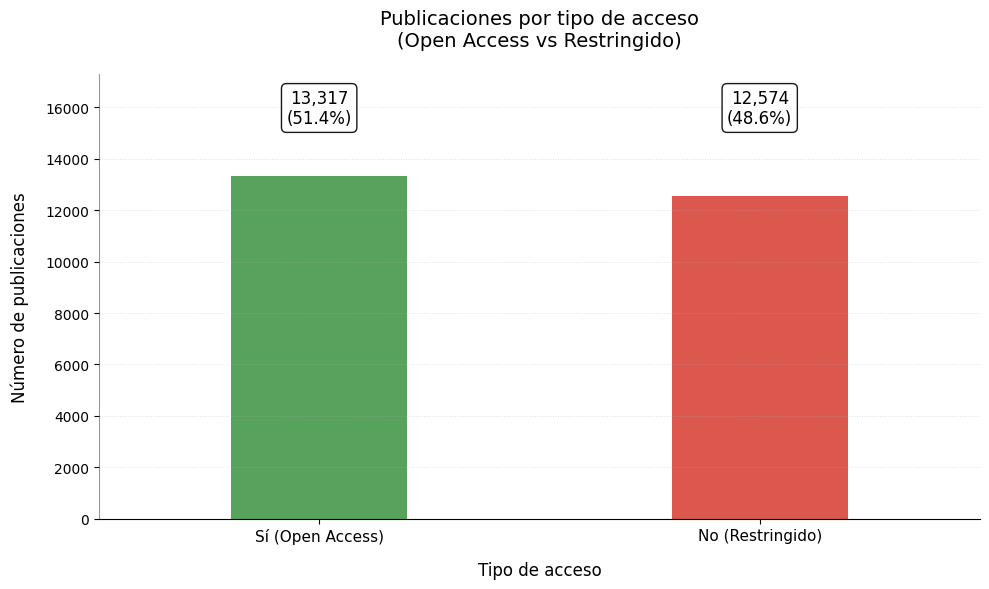

In [52]:
# Verificación y preparación de datos
counts = df_not_in_ir['is_oa'].value_counts().reindex([True, False])
percentages = (df_not_in_ir['is_oa'].value_counts(normalize=True)
              .reindex([True, False]) * 100)

print("Conteos verificados:")
print(counts)
print("\nPorcentajes verificados:")
print(percentages)

# Configuración del gráfico
plt.figure(figsize=(10, 6))
colors = ['#F44336','#4CAF50']  # Verde para Open Access, Rojo para Restringido

# Gráfico
ax = sns.barplot(x=counts.index, y=counts.values, hue=counts.index, 
                 palette=colors, width=0.4, order=[True, False],
                 legend=False, dodge=False)

# Personalización avanzada
plt.title('Publicaciones por tipo de acceso\n(Open Access vs Restringido)', 
          fontsize=14, pad=20)
plt.xlabel('Tipo de acceso', labelpad=12, fontsize=12)
plt.ylabel('Número de publicaciones', labelpad=12, fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Sí (Open Access)', 'No (Restringido)'], fontsize=11)

# Altura uniforme para textos (20% sobre el máximo)
text_height = max(counts.values) * 1.20

# Etiquetas
for i, (v, p) in enumerate(zip(counts.values, percentages)):
    ax.text(i, text_height, f"{v:,}\n({p:.1f}%)", 
            ha='center', va='center', fontsize=12,
            bbox=dict(facecolor='white', alpha=0.9, boxstyle='round,pad=0.3'))

# Estilo 
ax.yaxis.grid(True, linestyle=':', linewidth=0.7, alpha=0.4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.4)

plt.ylim(0, max(counts.values)*1.3)
plt.tight_layout()
plt.show()

### Caso 2: Enriquecimiento de publicaciones ya integradas

Para las publicaciones que ya están en el IR, se pueden mejorar sus metadatos con datos de OpenAlex como:

* Agregar métricas de impacto
* Completar datos faltantes
* Detectar errores o inconsistencias entre ambos sistemas

**Agregar métricas de impacto**

cited_by_count, fwci, citation_normalized_percentile_value.

In [31]:
df_in_ir[['handle','cited_by_count','fwci','citation_normalized_percentile_value']]

,handle,cited_by_count,fwci,citation_normalized_percentile_value
1,10915/98263,7,1,1
2,10915/127176,1,0,0
...,...,...,...,...
39602,10915/102081,15,1,1
39605,10915/4583,12,0,1


Top 10 de artículos más citados (el core de tu pregunta)

[05/09/25 14:42:51] WARNING  /tmp/ipykernel_302730/3863068577.py:6: FutureWarning:                  ]8;id=372305;file:///usr/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=499466;file:///usr/lib/python3.10/warnings.py#109\109]8;;\
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               ax = sns.barplot(data=top_cited, y='handle', x='cited_by_count',                    
                             palette='viridis')                                                                    
                                                                                                                   

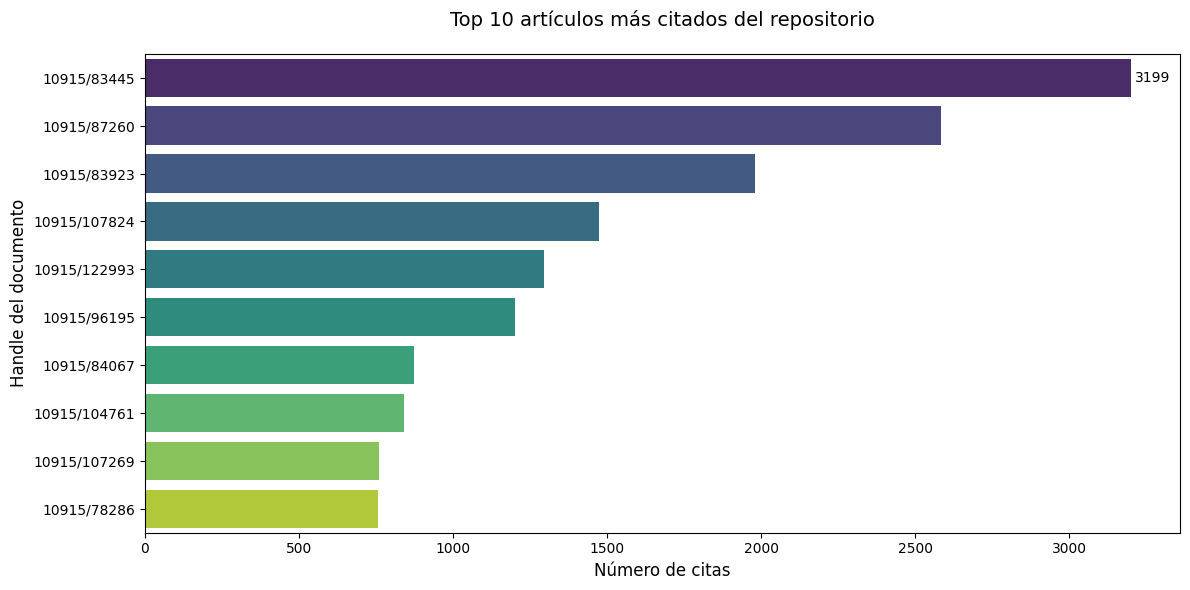

In [32]:
# Top 10 más citados
top_cited = df_in_ir.nlargest(10, 'cited_by_count')[['handle', 'cited_by_count', 'fwci']]

# Gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_cited, y='handle', x='cited_by_count', palette='viridis')

# Personalización
plt.title('Top 10 artículos más citados del repositorio', fontsize=14, pad=20)
plt.xlabel('Número de citas', fontsize=12)
plt.ylabel('Handle del documento', fontsize=12)
ax.bar_label(ax.containers[0], fmt='%d', padding=3)

plt.tight_layout()
plt.show()

 Tabla resumen de métricas clave (complemento ideal)

In [37]:
# Calculamos métricas agregadas
metrics = df_in_ir.agg({
    'cited_by_count': ['sum', 'mean', 'max'],
    'fwci': ['mean', 'median'],
    'citation_normalized_percentile_value': ['mean']
}).round(2)

print("\nMétricas clave del repositorio:")
print(metrics)


Métricas clave del repositorio:
        cited_by_count  fwci  citation_normalized_percentile_value
sum          254583.00   NaN                                   NaN
mean             18.56  1.34                                  0.63
max            3199.00   NaN                                   NaN
median             NaN  0.00                                   NaN


**Detectar errores o inconsistencias entre ambos sistemas**

ej.: título distinto, año de publicación incorrecto, tipo mal asignado

<span style="color:red">TODO - Estan mal procesadas las fechas en landing</span>



In [48]:
discrepant = df_in_ir[
    pd.to_datetime(df_in_ir['dateissued']).dt.normalize() != 
    pd.to_datetime(df_in_ir['publication_date']).dt.normalize()
]

discrepant[['work_id','publication_date','handle', 'dateissued']]

,work_id,publication_date,handle,dateissued
1,https://openalex.org/W3031656744,2020-05-14 21:00:00,10915/98263,2020-04-30 21:00:00
2,https://openalex.org/W2126508961,2015-10-06 21:00:00,10915/127176,2015-12-31 21:00:00
...,...,...,...,...
39599,https://openalex.org/W1671074551,2001-07-31 21:00:00,10915/2064,2000-12-31 21:00:00
39601,https://openalex.org/W2230789674,1995-12-31 21:00:00,10915/137424,1994-12-31 21:00:00


**Completar datos faltantes**

como publication_date, type, oa_status, language, etc.


### Caso 3: Análisis de acceso abierto en el IR

Comprobar cuántas publicaciones en el IR son realmente OA según OpenAlex (is_oa), y:

Detectar publicaciones cerradas que podrían estar en OA.

Sugerir acciones a tomar con base en oa_status y si hay oa_url

### Caso 4: Detección de publicaciones retracted o paratextos

is_retracted: marcar publicaciones retiradas.

is_paratext: excluir editoriales, prólogos, etc. de métricas.

### Caso 5: Cálculo de indicadores institucionales

Podés agrupar por institución (si tenés el bridge entre publicaciones y autores → y autores con filiación institucional) para calcular:

Impacto promedio (fwci, cited_by_count).

Porcentaje OA.

Porcentaje en top 10% y top 1% mundial (citation_normalized_percentile_is_in_top_*).

